# House Prices - Advanced Regression Techniques

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home, I am going to implement a ML regression model to predict each house price.

[you can know more about th data here](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data)

In [1]:
# install requirements packages
#!pip install -r requirements.txt

In [2]:
# import libs 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# stats imports
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import chi2_contingency, boxcox 

# sklearn imports
from sklearn import preprocessing

## Data Ingestion

In [3]:
# download house-prices-advanced-regression-techniques data using kaggle API
#!kaggle competitions download -c house-prices-advanced-regression-techniques --force

In [4]:
# unzip house-prices-advanced-regression-techniques.zip to get the data files
#!unzip house-prices-advanced-regression-techniques.zip

In [5]:
# ls the data files 
!ls

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [6]:
!cat data_description.txt

'cat' is not recognized as an internal or external command,
operable program or batch file.


In [7]:
# activate venv house_pricing
!.house_pricing\Scripts\activate.bat

In [8]:
# import data to df
train = pd.read_csv("train.csv")

##  Eploratory Data Analysis and Data prepreprocess

In [9]:
# make a copy of the original data
train1 = train.copy()

In [10]:
# explore train data
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [11]:
# ["OverallQual", "OverallCond"] represent ordinal categories
# convert them to object dtype for preprocessing
train1["OverallQual"] = train1["OverallQual"].astype("object")
train1["OverallCond"] = train1["OverallCond"].astype("object")

### Split df into features into numeric and categorical

In [12]:
# create data frame for numeric features and df for categorical feature
y = train1[["SalePrice"]]
x_num = train1.select_dtypes(np.number)
x_cat = train1.select_dtypes("object")

### Numeric Features EDA

In [13]:
# explore train1_xnum df
x_num.head()

,Id,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,2003,2003,196.0,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,1976,1976,0.0,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,2001,2002,162.0,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,1915,1970,0.0,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,2000,2000,350.0,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000


In [14]:
# explore train1_xnum df
x_num.shape

(1460, 36)

In [15]:
# explore train1_xnum df
x_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   YearBuilt      1460 non-null   int64  
 5   YearRemodAdd   1460 non-null   int64  
 6   MasVnrArea     1452 non-null   float64
 7   BsmtFinSF1     1460 non-null   int64  
 8   BsmtFinSF2     1460 non-null   int64  
 9   BsmtUnfSF      1460 non-null   int64  
 10  TotalBsmtSF    1460 non-null   int64  
 11  1stFlrSF       1460 non-null   int64  
 12  2ndFlrSF       1460 non-null   int64  
 13  LowQualFinSF   1460 non-null   int64  
 14  GrLivArea      1460 non-null   int64  
 15  BsmtFullBath   1460 non-null   int64  
 16  BsmtHalfBath   1460 non-null   int64  
 17  FullBath       1460 non-null   int64  
 18  HalfBath

In [16]:
# explore train1_xnum df
x_num.describe()

,Id,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [17]:
# EDA for numeric features
# build the figure
#fig = plt.figure(figsize=(20, 14))
#for col in x_num.columns:
#   sns.displot(x_num[col], kind = "kde")

### Numeric Features Data Cleaning

#### Drop Unnessecary Numeric Columns

In [18]:
"""
drop
"Id" --> identification column
"MSSubClass" --> not numeric represent dwelling included in the sell
"GarageYrBlt" --> do not contribute to the target variable
"""
x_num.drop(["Id", "MSSubClass", "GarageYrBlt"], axis =  1, inplace = True)

C:\Users\original\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


#### Null Values Imputation

In [19]:
# null counts
x_num.isnull().sum()

LotFrontage      259
LotArea            0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [20]:
"""
Low null values counts, Fill nulls with the medien
"""
x_num.fillna(x_num.median(), inplace = True)

C:\Users\original\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [21]:
# test for null counts
x_num.isnull().sum()

LotFrontage      0
LotArea          0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

### Explore Correlation and Check Collinearity

<AxesSubplot:>

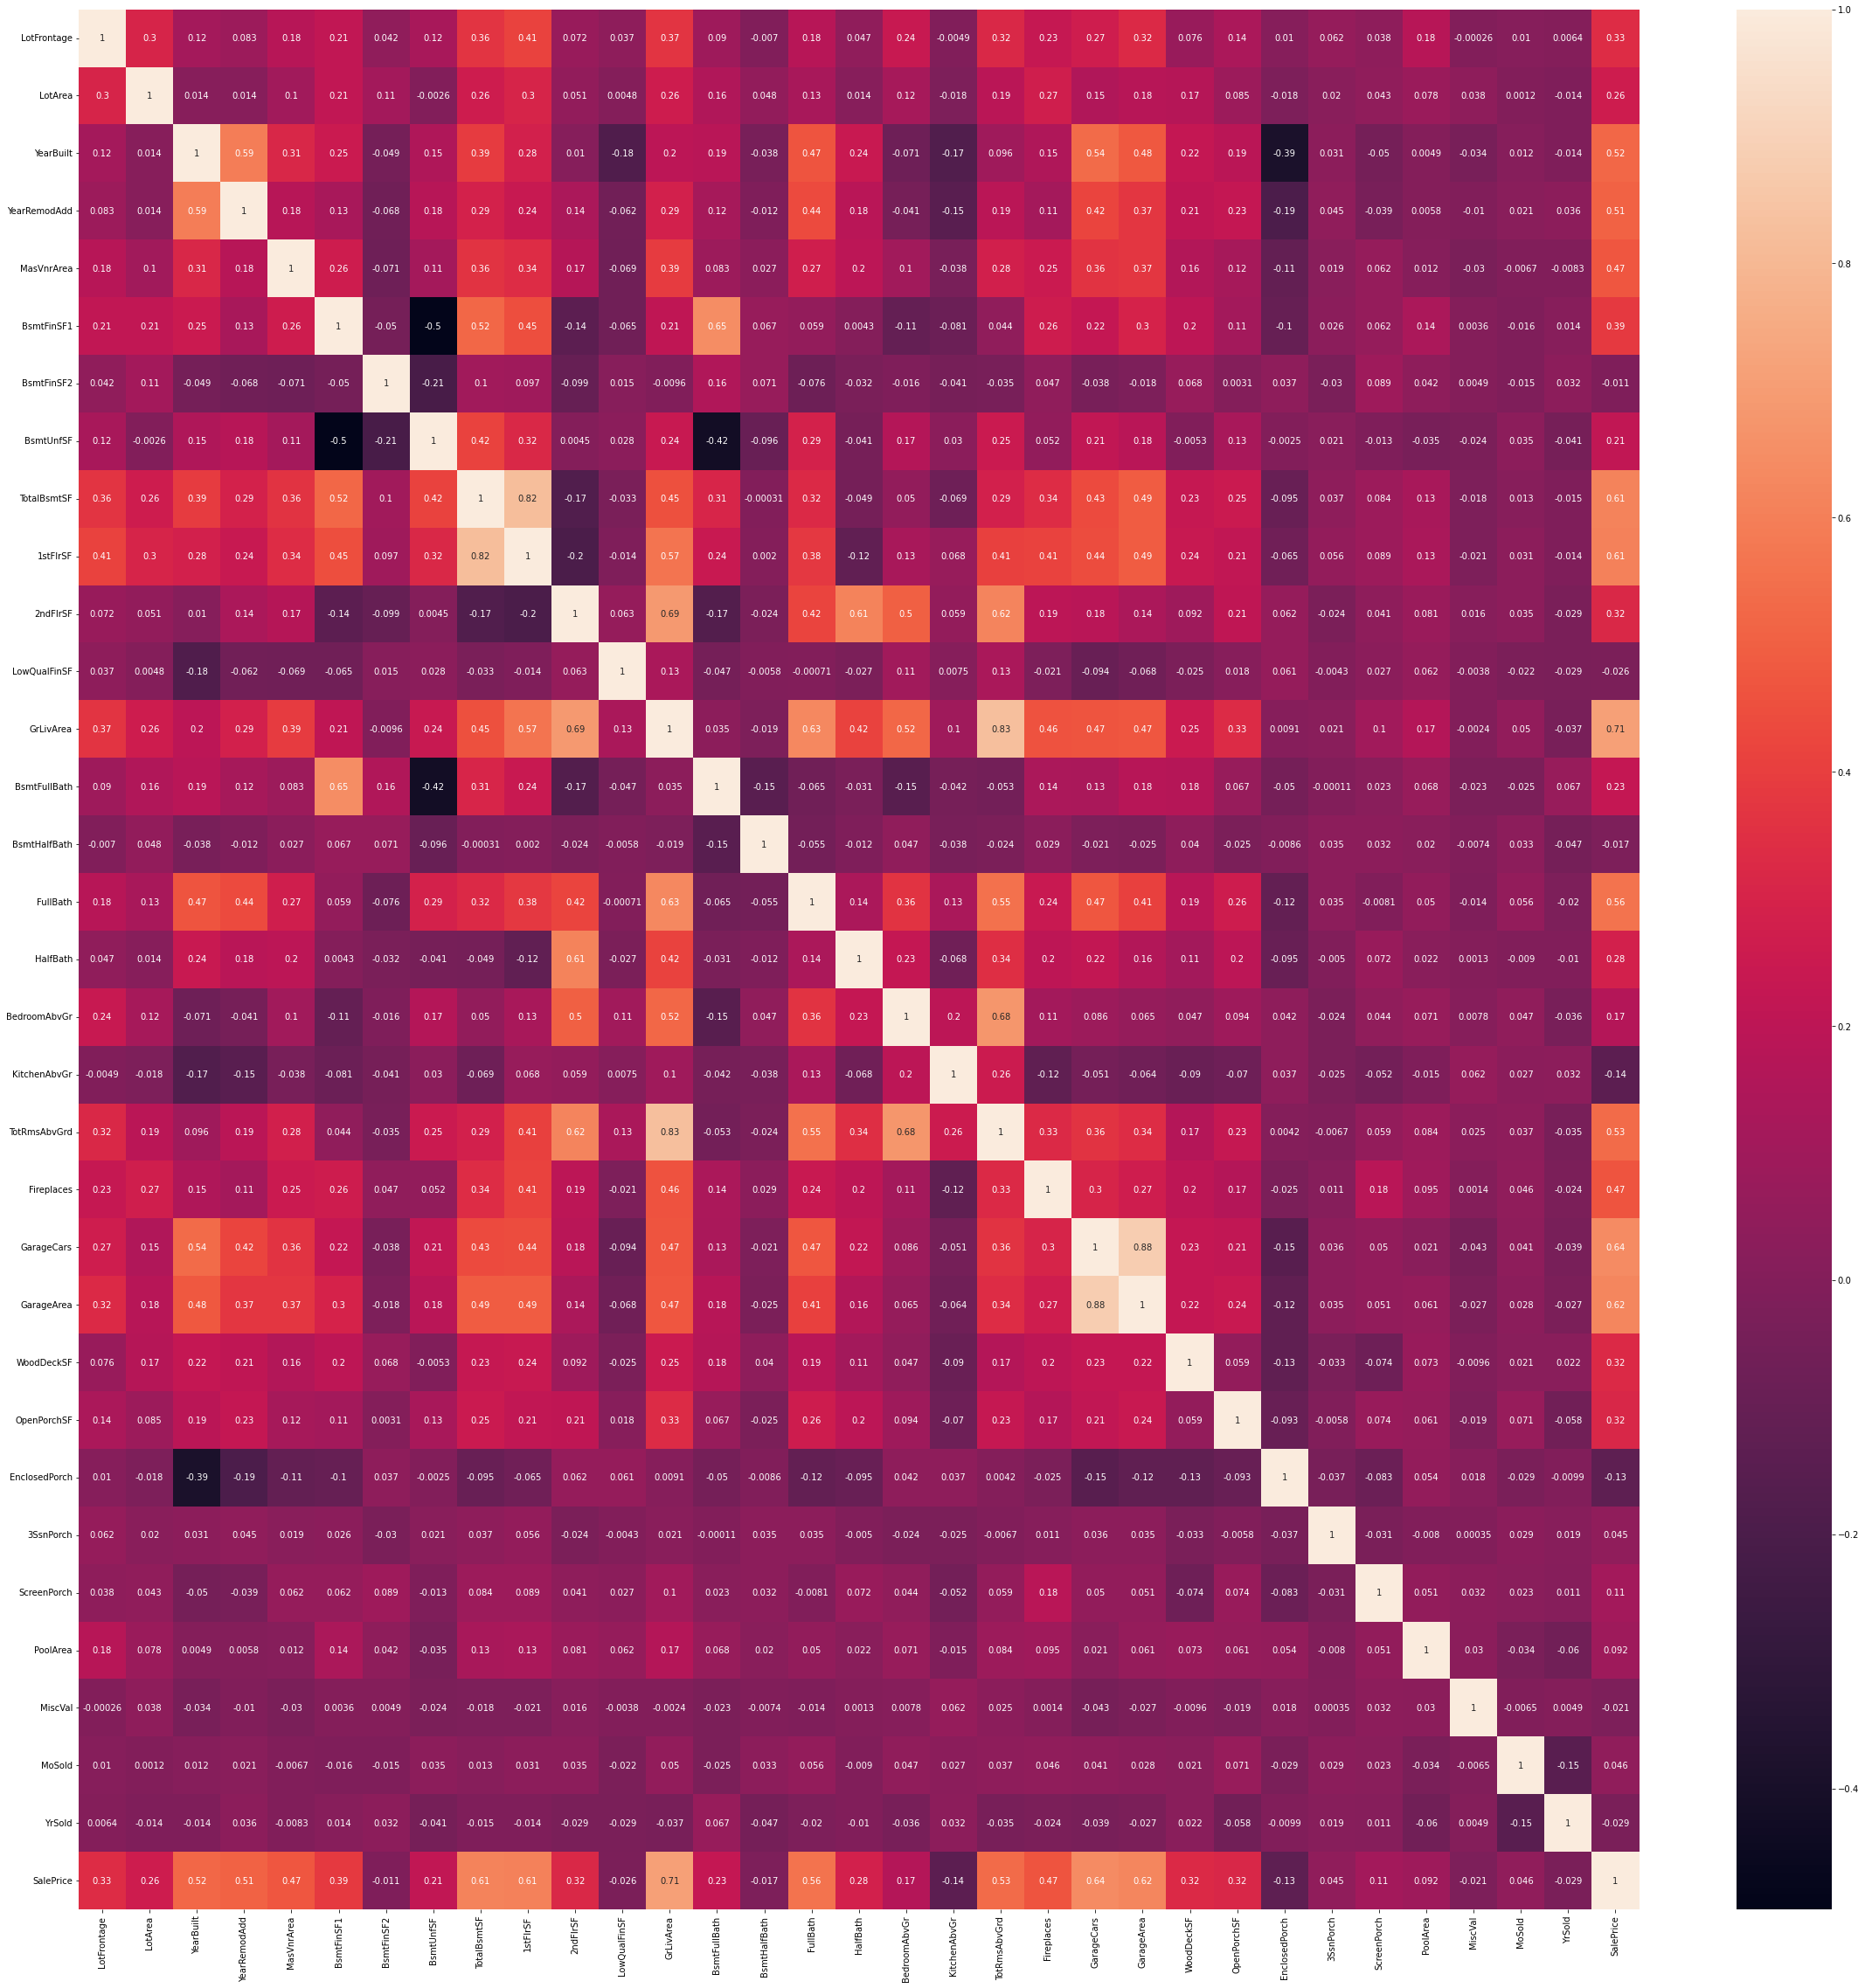

In [22]:
# plot corr heat map
corr_map = x_num.corr()

plt.figure(figsize = (40, 40))
sns.heatmap(corr_map, annot = True)

In [23]:
# print the corr between predictor and target variable in descending order
target_corr = corr_map["SalePrice"].sort_values(ascending = False)
target_corr

SalePrice        1.000000
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.334771
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

In [24]:
# drop low correlated features
x_num.drop(["SalePrice"], axis = 1, inplace = True)

In [25]:
# exclude features with low correlations for feature engineering
# init low corr list
low_corr = []

# loop over each column corr value
for col in target_corr.index:
    if abs(target_corr[col]) < .25:
        low_corr.append(col)

# print low corr list
low_corr

['BsmtFullBath',
 'BsmtUnfSF',
 'BedroomAbvGr',
 'ScreenPorch',
 'PoolArea',
 'MoSold',
 '3SsnPorch',
 'BsmtFinSF2',
 'BsmtHalfBath',
 'MiscVal',
 'LowQualFinSF',
 'YrSold',
 'EnclosedPorch',
 'KitchenAbvGr']

In [26]:
# drop low correlated features
x_num.drop(low_corr, axis = 1, inplace = True)

In [27]:
x_num.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF
0,65.0,8450,2003,2003,196.0,706,856,856,854,1710,2,1,8,0,2,548,0,61
1,80.0,9600,1976,1976,0.0,978,1262,1262,0,1262,2,0,6,1,2,460,298,0
2,68.0,11250,2001,2002,162.0,486,920,920,866,1786,2,1,6,1,2,608,0,42
3,60.0,9550,1915,1970,0.0,216,756,961,756,1717,1,0,7,1,3,642,0,35
4,84.0,14260,2000,2000,350.0,655,1145,1145,1053,2198,2,1,9,1,3,836,192,84


## Categorical Features EDA

In [28]:
# explore train1_xcat df
x_cat.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [29]:
# explore train1_xcat df
x_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 45 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   Alley          91 non-null     object
 3   LotShape       1460 non-null   object
 4   LandContour    1460 non-null   object
 5   Utilities      1460 non-null   object
 6   LotConfig      1460 non-null   object
 7   LandSlope      1460 non-null   object
 8   Neighborhood   1460 non-null   object
 9   Condition1     1460 non-null   object
 10  Condition2     1460 non-null   object
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   object
 13  OverallQual    1460 non-null   object
 14  OverallCond    1460 non-null   object
 15  RoofStyle      1460 non-null   object
 16  RoofMatl       1460 non-null   object
 17  Exterior1st    1460 non-null   object
 18  Exterior2nd    1460 non-null

In [30]:
# explore train1_xcat
x_cat.describe(include = "object")

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


#### Categorical null values imputation

In [31]:
# explore train1_xcat df
x_cat.isnull().sum()

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int

In [32]:
# drop columns that has high null values number
x_cat.drop(["Alley", "FireplaceQu", "PoolQC", "Fence", "MiscFeature", "MasVnrType"], axis = 1, inplace = True)

C:\Users\original\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [33]:
# explore train1_xcat df
x_cat.isnull().sum()

MSZoning          0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Heating           0
HeatingQC         0
CentralAir        0
Electrical        1
KitchenQual       0
Functional        0
GarageType       81
GarageFinish     81
GarageQual       81
GarageCond       81
PavedDrive        0
SaleType          0
SaleCondition     0
dtype: int64

### Check Dependency fro Categorical features

In [34]:
# define function to check dependency
def dependency(df, cat_feature):
    # build the table of frequicies of each target observation in each category
    table = pd.crosstab(y["SalePrice"], df[cat_feature])
    
    # calculate the chi2 test
    chi2, p_value, dof, expected_intervals = chi2_contingency(table)
    
    # define the significance_level
    alpha = 0.05
    
    # print the output
    print(f"FEATURE NAME: {cat_feature}")
    print(f"DEGREE OF FREEDOM: {dof}")
    print(f"P-VALUE: {p_value}")
    print(f"EXPECTED INTERVALS: {expected_intervals}")
    print("\n")
    
    # print if the feature is dependant or not
    if p_value <= alpha:
        print(f"HYPOTHESIS TEST: {cat_feature} REJECT NULL HYPOTHESIS, THE VARIABLES IS DEPENDENT")
        print("\n\n")
        # return the feature
        return cat_feature
    
    else:
        print(f'HYPOTHESIS TEST: {cat_feature}: ACCEPT NULL HYPOTHESIS, THE VARIABLES IS INDEPENDENT')
        print("\n\n")

In [35]:
# iter over the df to check dependency
# define the independant features
dependats = []
for col in x_cat.columns:
    dependat = dependency(x_cat, col)
    
    # append the independant feature to the independants list
    dependats.append(dependat)

FEATURE NAME: MSZoning
DEGREE OF FREEDOM: 2648
P-VALUE: 4.348325060681923e-11
EXPECTED INTERVALS: [[0.00684932 0.04452055 0.0109589  0.78835616 0.14931507]
 [0.00684932 0.04452055 0.0109589  0.78835616 0.14931507]
 [0.00684932 0.04452055 0.0109589  0.78835616 0.14931507]
 ...
 [0.00684932 0.04452055 0.0109589  0.78835616 0.14931507]
 [0.00684932 0.04452055 0.0109589  0.78835616 0.14931507]
 [0.00684932 0.04452055 0.0109589  0.78835616 0.14931507]]


HYPOTHESIS TEST: MSZoning REJECT NULL HYPOTHESIS, THE VARIABLES IS DEPENDENT



FEATURE NAME: Street
DEGREE OF FREEDOM: 662
P-VALUE: 8.338870380463891e-09
EXPECTED INTERVALS: [[0.00410959 0.99589041]
 [0.00410959 0.99589041]
 [0.00410959 0.99589041]
 ...
 [0.00410959 0.99589041]
 [0.00410959 0.99589041]
 [0.00410959 0.99589041]]


HYPOTHESIS TEST: Street REJECT NULL HYPOTHESIS, THE VARIABLES IS DEPENDENT



FEATURE NAME: LotShape
DEGREE OF FREEDOM: 1986
P-VALUE: 4.724729155980402e-12
EXPECTED INTERVALS: [[0.33150685 0.02808219 0.00684932 0.

FEATURE NAME: Exterior1st
DEGREE OF FREEDOM: 9268
P-VALUE: 0.9999839433628513
EXPECTED INTERVALS: [[0.01369863 0.00068493 0.00136986 ... 0.35273973 0.14109589 0.01780822]
 [0.01369863 0.00068493 0.00136986 ... 0.35273973 0.14109589 0.01780822]
 [0.01369863 0.00068493 0.00136986 ... 0.35273973 0.14109589 0.01780822]
 ...
 [0.01369863 0.00068493 0.00136986 ... 0.35273973 0.14109589 0.01780822]
 [0.01369863 0.00068493 0.00136986 ... 0.35273973 0.14109589 0.01780822]
 [0.01369863 0.00068493 0.00136986 ... 0.35273973 0.14109589 0.01780822]]


HYPOTHESIS TEST: Exterior1st: ACCEPT NULL HYPOTHESIS, THE VARIABLES IS INDEPENDENT



FEATURE NAME: Exterior2nd
DEGREE OF FREEDOM: 9930
P-VALUE: 0.8469189757654344
EXPECTED INTERVALS: [[0.01369863 0.00205479 0.00479452 ... 0.34520548 0.13493151 0.0260274 ]
 [0.01369863 0.00205479 0.00479452 ... 0.34520548 0.13493151 0.0260274 ]
 [0.01369863 0.00205479 0.00479452 ... 0.34520548 0.13493151 0.0260274 ]
 ...
 [0.01369863 0.00205479 0.00479452 ... 0.3452054

FEATURE NAME: GarageFinish
DEGREE OF FREEDOM: 1278
P-VALUE: 1.035588693092293e-09
EXPECTED INTERVALS: [[0.25525743 0.30601885 0.43872371]
 [0.25525743 0.30601885 0.43872371]
 [0.25525743 0.30601885 0.43872371]
 ...
 [0.25525743 0.30601885 0.43872371]
 [0.25525743 0.30601885 0.43872371]
 [0.25525743 0.30601885 0.43872371]]


HYPOTHESIS TEST: GarageFinish REJECT NULL HYPOTHESIS, THE VARIABLES IS DEPENDENT



FEATURE NAME: GarageQual
DEGREE OF FREEDOM: 2556
P-VALUE: 2.538428577754634e-13
EXPECTED INTERVALS: [[0.00217549 0.03480783 0.01015228 0.00217549 0.95068891]
 [0.00217549 0.03480783 0.01015228 0.00217549 0.95068891]
 [0.00217549 0.03480783 0.01015228 0.00217549 0.95068891]
 ...
 [0.00217549 0.03480783 0.01015228 0.00217549 0.95068891]
 [0.00217549 0.03480783 0.01015228 0.00217549 0.95068891]
 [0.00217549 0.03480783 0.01015228 0.00217549 0.95068891]]


HYPOTHESIS TEST: GarageQual REJECT NULL HYPOTHESIS, THE VARIABLES IS DEPENDENT



FEATURE NAME: GarageCond
DEGREE OF FREEDOM: 2556
P-V

In [36]:
# get the dependant variables list
dependats = list(filter(lambda x : x is not None, dependats))
dependats

['MSZoning',
 'Street',
 'LotShape',
 'LotConfig',
 'Neighborhood',
 'OverallQual',
 'OverallCond',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'Heating',
 'CentralAir',
 'KitchenQual',
 'GarageFinish',
 'GarageQual',
 'SaleType',
 'SaleCondition']

In [37]:
# get only dependant feature
x_cat = x_cat[dependats]

In [38]:
x_cat.shape

(1460, 20)

### preprocessing for categorical features

In [39]:
x_cat.isnull().sum()

MSZoning          0
Street            0
LotShape          0
LotConfig         0
Neighborhood      0
OverallQual       0
OverallCond       0
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         37
BsmtCond         37
BsmtExposure     38
Heating           0
CentralAir        0
KitchenQual       0
GarageFinish     81
GarageQual       81
SaleType          0
SaleCondition     0
dtype: int64

__Null values in these columns represent values__

In [40]:
# desfine ordinal and nominal features
ordinal_features = ['LotShape',  'OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'KitchenQual', 'GarageFinish', 'GarageQual']
nominal_features = list(filter(lambda x: x not in ordinal_features, x_cat))

### Null Values imputation

In [41]:
x_cat[nominal_features] = x_cat[nominal_features].fillna(x_cat[nominal_features].mode())

In [42]:
x_cat[nominal_features].isnull().sum()

MSZoning         0
Street           0
LotConfig        0
Neighborhood     0
Foundation       0
Heating          0
CentralAir       0
SaleType         0
SaleCondition    0
dtype: int64

## Encoding and Transformation

### Label Encoding

In [43]:
# sperate ordinal values based on the values and the mapping
ordinal_features_0 = ['OverallQual', 'OverallCond']
ordinal_features_1 = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'KitchenQual', 'GarageQual']
ordinal_features_2 = ['LotShape']
ordinal_features_3 = ['BsmtExposure']
ordinal_features_4 = ['GarageFinish']

In [44]:
# define label encoding functions
def map1(x):
    return x.map({np.nan : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5})

def map2(x):
    return x.map({np.nan : 0, "IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4})

def map3(x):
    return x.map({np.nan : 0, "No" : 1, "Mn" : 2, "Av" : 3, "Gd" : 4})

def map4(x):
    return x.map({np.nan : 0, "Unf" : 1, "RFn" : 2, "Fin" : 3})

In [45]:
# label encode ordinal feature
x_cat[ordinal_features_0] = x_cat[ordinal_features_0].astype(int)
x_cat[ordinal_features_1] = x_cat[ordinal_features_1].apply(map1)
x_cat[ordinal_features_2] = x_cat[ordinal_features_2].apply(map2)
x_cat[ordinal_features_3] = x_cat[ordinal_features_3].apply(map3)
x_cat[ordinal_features_4] = x_cat[ordinal_features_4].apply(map4)

In [46]:
x_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   LotShape       1460 non-null   int64 
 3   LotConfig      1460 non-null   object
 4   Neighborhood   1460 non-null   object
 5   OverallQual    1460 non-null   int32 
 6   OverallCond    1460 non-null   int32 
 7   ExterQual      1460 non-null   int64 
 8   ExterCond      1460 non-null   int64 
 9   Foundation     1460 non-null   object
 10  BsmtQual       1460 non-null   int64 
 11  BsmtCond       1460 non-null   int64 
 12  BsmtExposure   1460 non-null   int64 
 13  Heating        1460 non-null   object
 14  CentralAir     1460 non-null   object
 15  KitchenQual    1460 non-null   int64 
 16  GarageFinish   1460 non-null   int64 
 17  GarageQual     1460 non-null   int64 
 18  SaleType       1460 non-null

### Encoding

In [47]:
# one-hot encode nominal feature
# initilize one-hot encoder
one_hot_encoder = preprocessing.OneHotEncoder()

In [48]:
# fit the encoder
one_hot_encoder.fit(x_cat[nominal_features])

OneHotEncoder()

In [49]:
x_nom_encoded = one_hot_encoder.transform(x_cat[nominal_features]).toarray()

In [50]:
x_nom_encoded = pd.DataFrame(x_nom_encoded).astype(int)

In [51]:
# drop original nominal features
x_cat.drop(nominal_features, axis = 1, inplace = True)

In [52]:
# concat the encoded columns
x_cat = pd.concat([x_cat, x_nom_encoded], axis = 1)

In [53]:
x_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   LotShape      1460 non-null   int64
 1   OverallQual   1460 non-null   int32
 2   OverallCond   1460 non-null   int32
 3   ExterQual     1460 non-null   int64
 4   ExterCond     1460 non-null   int64
 5   BsmtQual      1460 non-null   int64
 6   BsmtCond      1460 non-null   int64
 7   BsmtExposure  1460 non-null   int64
 8   KitchenQual   1460 non-null   int64
 9   GarageFinish  1460 non-null   int64
 10  GarageQual    1460 non-null   int64
 11  0             1460 non-null   int32
 12  1             1460 non-null   int32
 13  2             1460 non-null   int32
 14  3             1460 non-null   int32
 15  4             1460 non-null   int32
 16  5             1460 non-null   int32
 17  6             1460 non-null   int32
 18  7             1460 non-null   int32
 19  8             1460 non-null

In [54]:
# concat cat_nom, cat_ord and num dfs
frames = [x_num, x_cat]

train = pd.concat(frames, axis = 1)

In [55]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 95 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1460 non-null   float64
 1   LotArea       1460 non-null   int64  
 2   YearBuilt     1460 non-null   int64  
 3   YearRemodAdd  1460 non-null   int64  
 4   MasVnrArea    1460 non-null   float64
 5   BsmtFinSF1    1460 non-null   int64  
 6   TotalBsmtSF   1460 non-null   int64  
 7   1stFlrSF      1460 non-null   int64  
 8   2ndFlrSF      1460 non-null   int64  
 9   GrLivArea     1460 non-null   int64  
 10  FullBath      1460 non-null   int64  
 11  HalfBath      1460 non-null   int64  
 12  TotRmsAbvGrd  1460 non-null   int64  
 13  Fireplaces    1460 non-null   int64  
 14  GarageCars    1460 non-null   int64  
 15  GarageArea    1460 non-null   int64  
 16  WoodDeckSF    1460 non-null   int64  
 17  OpenPorchSF   1460 non-null   int64  
 18  LotShape      1460 non-null 

### Transformation

In [56]:
# transform numeric value
scaler = preprocessing.StandardScaler()
scaler.fit(train)

StandardScaler()

In [57]:
train_preprocessed = scaler.transform(train)

In [58]:
train_preprocessed.shape

(1460, 95)

### target variable investigation

In [59]:
y = train1[["SalePrice"]]

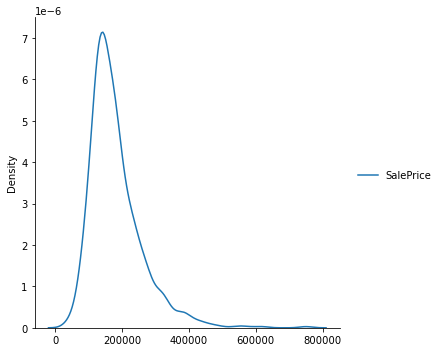

In [60]:
# distribution plot
sns.displot(y, kind = "kde")

In [61]:
# get the skewness value
y.skew()

SalePrice    1.882876
dtype: float64

__It is highly skewed, apply log transformation__

In [62]:
y = np.log1p(y["SalePrice"])

In [63]:
y.skew()

0.12134661989685333

### Output train data

In [64]:
pd.DataFrame(train_preprocessed).to_csv("train_preprocessed.csv")

In [65]:
pd.DataFrame(y).to_csv("y_preprocessed.csv")

## Test Data Preprocessing

In [66]:
# load data
test = pd.read_csv("test.csv")

In [67]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

## Apply preprocessing for Test Set

In [68]:
# copy test data frame
test1 = test.copy()

In [69]:
# ["OverallQual", "OverallCond"] represent ordinal categories
# convert them to object dtype for preprocessing
test1["OverallQual"] = test1["OverallQual"].astype("object")
test1["OverallCond"] = test1["OverallCond"].astype("object")

In [70]:
# create data frame for numeric features and df for categorical feature
test1_num = test1.select_dtypes(np.number)
test1_cat = test1.select_dtypes("object")

In [71]:
test1_num.shape

(1459, 35)

In [72]:
test1_cat.shape

(1459, 45)

### Test Numeric Features Preprocessing

In [73]:
"""
drop
"Id" --> identification column
"MSSubClass" --> not numeric represent dwelling included in the sell
"GarageYrBlt" --> do not contribute to the target variable
"""
test1_num.drop(["Id", "MSSubClass", "GarageYrBlt"], axis =  1, inplace = True)

C:\Users\original\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [74]:
"""
Low null values counts, Fill nulls with the medien
"""
test1_num.fillna(test1_num.median(), inplace = True)

C:\Users\original\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [75]:
# drop low correlated features
test1_num.drop(low_corr, axis = 1, inplace = True)

In [76]:
test1_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1459 non-null   float64
 1   LotArea       1459 non-null   int64  
 2   YearBuilt     1459 non-null   int64  
 3   YearRemodAdd  1459 non-null   int64  
 4   MasVnrArea    1459 non-null   float64
 5   BsmtFinSF1    1459 non-null   float64
 6   TotalBsmtSF   1459 non-null   float64
 7   1stFlrSF      1459 non-null   int64  
 8   2ndFlrSF      1459 non-null   int64  
 9   GrLivArea     1459 non-null   int64  
 10  FullBath      1459 non-null   int64  
 11  HalfBath      1459 non-null   int64  
 12  TotRmsAbvGrd  1459 non-null   int64  
 13  Fireplaces    1459 non-null   int64  
 14  GarageCars    1459 non-null   float64
 15  GarageArea    1459 non-null   float64
 16  WoodDeckSF    1459 non-null   int64  
 17  OpenPorchSF   1459 non-null   int64  
dtypes: float64(6), int64(12)
mem

### Test Categorical Features Preprocessing

In [77]:
# drop columns that has high null values number
test1_cat.drop(["Alley", "FireplaceQu", "PoolQC", "Fence", "MiscFeature", "MasVnrType"], axis = 1, inplace = True)

In [78]:
# get only dependant feature
test1_cat = test1_cat[dependats]

In [79]:
test1_cat.isnull().sum()

MSZoning          4
Street            0
LotShape          0
LotConfig         0
Neighborhood      0
OverallQual       0
OverallCond       0
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         44
BsmtCond         45
BsmtExposure     44
Heating           0
CentralAir        0
KitchenQual       1
GarageFinish     78
GarageQual       78
SaleType          1
SaleCondition     0
dtype: int64

In [80]:
# label encode ordinal feature
test1_cat[ordinal_features_0] = test1_cat[ordinal_features_0].astype(int)
test1_cat[ordinal_features_1] = test1_cat[ordinal_features_1].apply(map1)
test1_cat[ordinal_features_2] = test1_cat[ordinal_features_2].apply(map2)
test1_cat[ordinal_features_3] = test1_cat[ordinal_features_3].apply(map3)
test1_cat[ordinal_features_4] = test1_cat[ordinal_features_4].apply(map4)

In [81]:
# null values imputions for nominal features
test1_cat.dropna(inplace = True)

### One-Hot Encoding

In [82]:
# one-hot encode nominal feature
test1_cat_encoded = one_hot_encoder.transform(test1_cat[nominal_features]).toarray()

In [83]:
# pickle the encoder
import pickle
pickle.dump(one_hot_encoder, open("DataEncoder.pkl", "wb"))

In [84]:
test1_cat_encoded = pd.DataFrame(x_nom_encoded).astype(int)

In [85]:
# drop original nominal features
test1_cat.drop(nominal_features, axis = 1, inplace = True)

In [86]:
# concat the encoded columns
test1_cat = pd.concat([test1_cat, test1_cat_encoded], axis = 1)

In [87]:
test1_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotShape      1454 non-null   float64
 1   OverallQual   1454 non-null   float64
 2   OverallCond   1454 non-null   float64
 3   ExterQual     1454 non-null   float64
 4   ExterCond     1454 non-null   float64
 5   BsmtQual      1454 non-null   float64
 6   BsmtCond      1454 non-null   float64
 7   BsmtExposure  1454 non-null   float64
 8   KitchenQual   1454 non-null   float64
 9   GarageFinish  1454 non-null   float64
 10  GarageQual    1454 non-null   float64
 11  0             1460 non-null   int32  
 12  1             1460 non-null   int32  
 13  2             1460 non-null   int32  
 14  3             1460 non-null   int32  
 15  4             1460 non-null   int32  
 16  5             1460 non-null   int32  
 17  6             1460 non-null   int32  
 18  7             1460 non-null 

In [88]:
# concat cat_nom, cat_ord and num dfs
frames = [test1_num, test1_cat]

test = pd.concat(frames, axis = 1)

In [89]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 95 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1459 non-null   float64
 1   LotArea       1459 non-null   float64
 2   YearBuilt     1459 non-null   float64
 3   YearRemodAdd  1459 non-null   float64
 4   MasVnrArea    1459 non-null   float64
 5   BsmtFinSF1    1459 non-null   float64
 6   TotalBsmtSF   1459 non-null   float64
 7   1stFlrSF      1459 non-null   float64
 8   2ndFlrSF      1459 non-null   float64
 9   GrLivArea     1459 non-null   float64
 10  FullBath      1459 non-null   float64
 11  HalfBath      1459 non-null   float64
 12  TotRmsAbvGrd  1459 non-null   float64
 13  Fireplaces    1459 non-null   float64
 14  GarageCars    1459 non-null   float64
 15  GarageArea    1459 non-null   float64
 16  WoodDeckSF    1459 non-null   float64
 17  OpenPorchSF   1459 non-null   float64
 18  LotShape      1454 non-null 

### Transformation for test set

In [90]:
# transform data
test_preprocessed = scaler.transform(test)

In [91]:
# pickle the scaler
pickle.dump(scaler, open("DataScaler.pkl", "wb"))

## Output the preprocessed Train and Test datasets

In [92]:
pd.DataFrame(test_preprocessed).to_csv("test_preprocessed.csv")